# 04_evaluation.ipynb


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Load data


In [27]:
X = pd.read_csv('../data/deliverytime_cleaned.csv')
y = X['Time_taken(min)']
X = X.drop('Time_taken(min)', axis=1)

# Ensure consistency with training features


In [28]:
if 'distance_km' in X.columns:
    X = X.drop('distance_km', axis=1)

# Load model


In [29]:
model = joblib.load('../models/best_model.pkl')
y_pred = model.predict(X)

# Evaluation metrics


In [30]:
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)

print("\nModel Evaluation:")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R^2 Score: {r2:.4f}")


Model Evaluation:
MAE: 1.1629
RMSE: 1.7268
R^2 Score: 0.9661


# Plot Actual vs Predicted


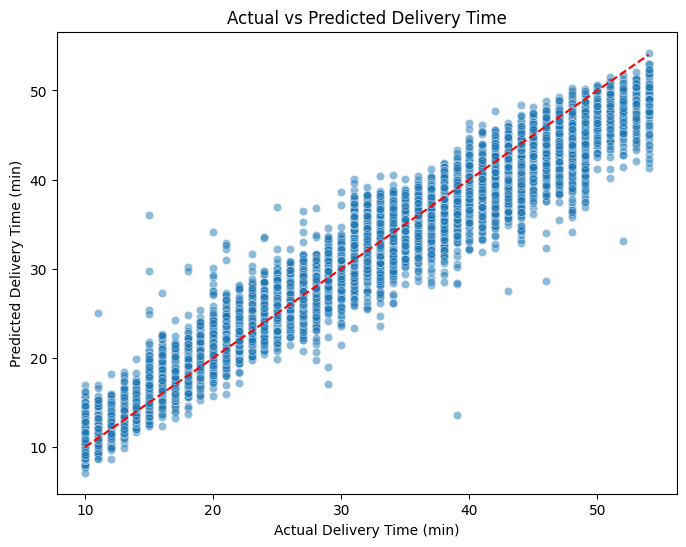

In [31]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y, y=y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Delivery Time (min)')
plt.ylabel('Predicted Delivery Time (min)')
plt.title('Actual vs Predicted Delivery Time')
plt.show()

# Residual Plot


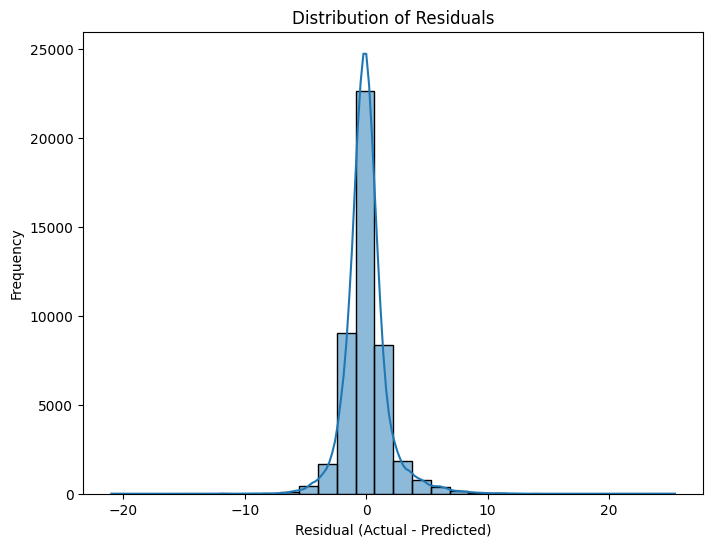

In [32]:
residuals = y - y_pred
plt.figure(figsize=(8,6))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residual (Actual - Predicted)')
plt.ylabel('Frequency')
plt.show()

# permutation_importance 

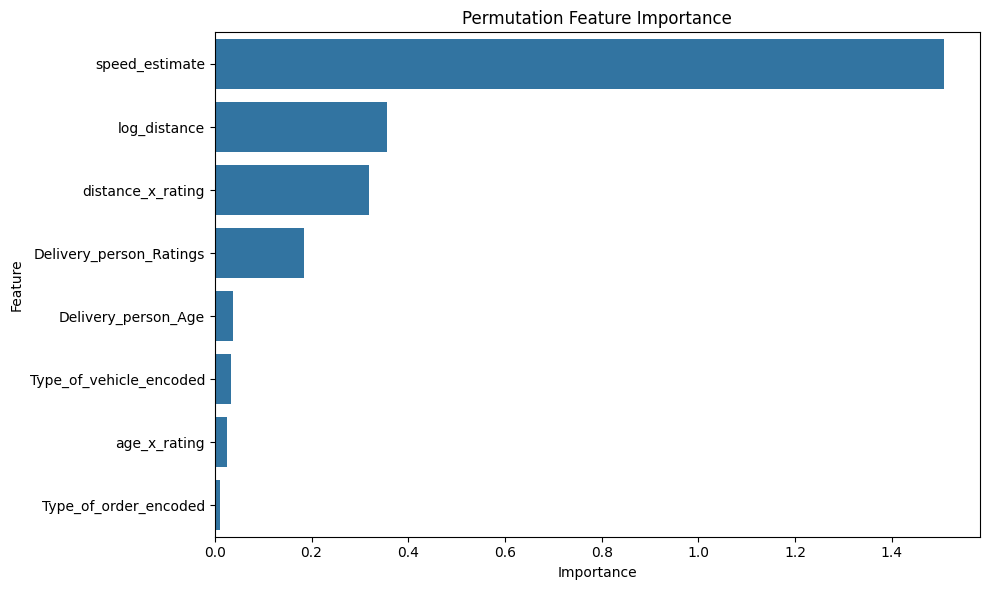

In [33]:
from sklearn.inspection import permutation_importance

result = permutation_importance(model, X, y, n_repeats=10, random_state=42, n_jobs=-1)
importances = result.importances_mean
feature_names = X.columns

fi_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
fi_df = fi_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=fi_df)
plt.title('Permutation Feature Importance')
plt.tight_layout()
plt.show()
